**用feature_selector进一步筛选预处理（添加标签）过后的风机数据**

In [1]:
from feature_selector import FeatureSelector
import pandas as pd

In [3]:
!ls ./train/processed/

15_data.csv  21_data.csv  processed.7z


In [6]:
train = pd.read_csv('train/processed/15_data.csv')
train_labels = train['frozen']
train.head()

,time,wind_speed,generator_speed,power,wind_direction,wind_direction_mean,yaw_position,yaw_speed,pitch1_angle,pitch2_angle,...,environment_tmp,int_tmp,pitch1_ng5_tmp,pitch2_ng5_tmp,pitch3_ng5_tmp,pitch1_ng5_DC,pitch2_ng5_DC,pitch3_ng5_DC,group,frozen
0,2015-11-01 20:20:16,1.859993,1.223595,2.515790,-2.072739,-2.073627,-0.655343,0.030804,0.555556,0.506667,...,-0.403919,0.014918,1.307692,1.123077,0.783077,1.36,0.00,1.56,1,0
1,2015-11-01 20:20:23,1.911625,1.293394,2.313551,-2.010591,-1.615140,-0.655343,0.030804,0.195556,0.133333,...,-0.421277,-0.002291,1.307692,1.123077,0.783077,0.44,2.88,-2.60,1,0
2,2015-11-01 20:20:30,1.635027,1.280099,2.507799,-2.053750,-0.282742,-0.649566,0.170338,0.964444,0.951111,...,-0.421277,-0.002291,1.307692,1.123077,0.783077,1.76,0.60,2.56,1,0
3,2015-11-01 20:20:37,1.786234,1.280099,2.349593,-2.007138,-2.234477,-0.655343,-0.004080,0.168889,0.137778,...,-0.403919,-0.002291,1.307692,1.123077,0.783077,2.80,-0.48,0.12,1,0
4,2015-11-01 20:20:47,1.786234,1.263480,2.321566,-2.264365,-1.428959,-0.637917,0.414524,0.182222,0.168889,...,-0.403919,0.014918,1.307692,1.123077,0.783077,-0.88,1.72,0.92,1,0


In [7]:
train = train.drop(columns = ['frozen'])

In [8]:
fs = FeatureSelector(data = train, labels = train_labels)


检测—Missing Values

In [12]:
fs.identify_missing(missing_threshold=0.01)

0 features with greater than 0.01 missing values.



In [13]:
missing_features = fs.ops['missing']
missing_features

[]

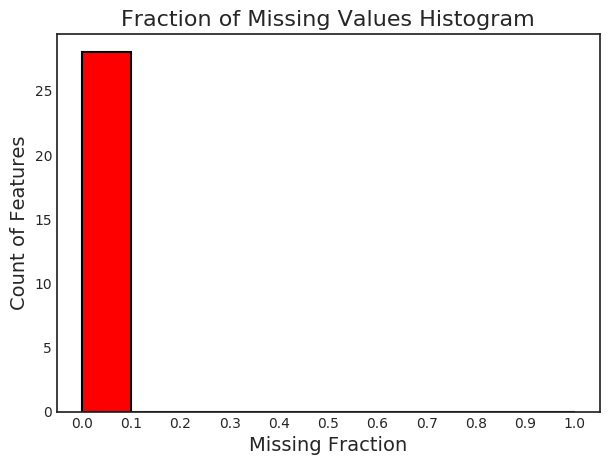

In [14]:
fs.plot_missing()

检测—Single Unique Values

In [15]:
fs.identify_single_unique()

0 features with a single unique value.



In [16]:
single_unique = fs.ops['single_unique']
single_unique

[]

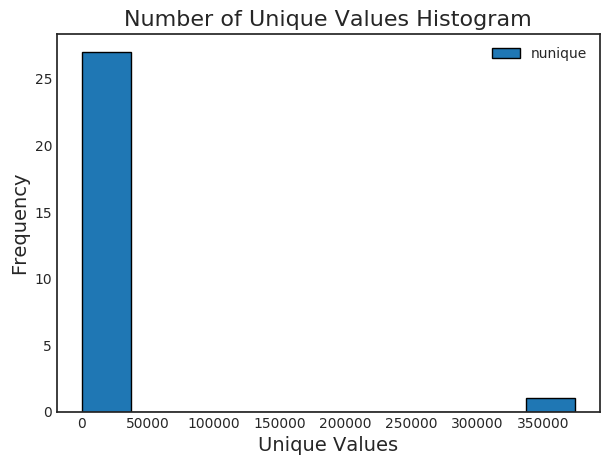

In [17]:
fs.plot_unique()

检测—Collinear (highly correlated) Features

In [18]:
fs.identify_collinear(correlation_threshold=0.975)

6 features with a correlation magnitude greater than 0.97.



In [19]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['pitch2_angle',
 'pitch3_angle',
 'pitch2_speed',
 'pitch3_speed',
 'pitch2_moto_tmp']

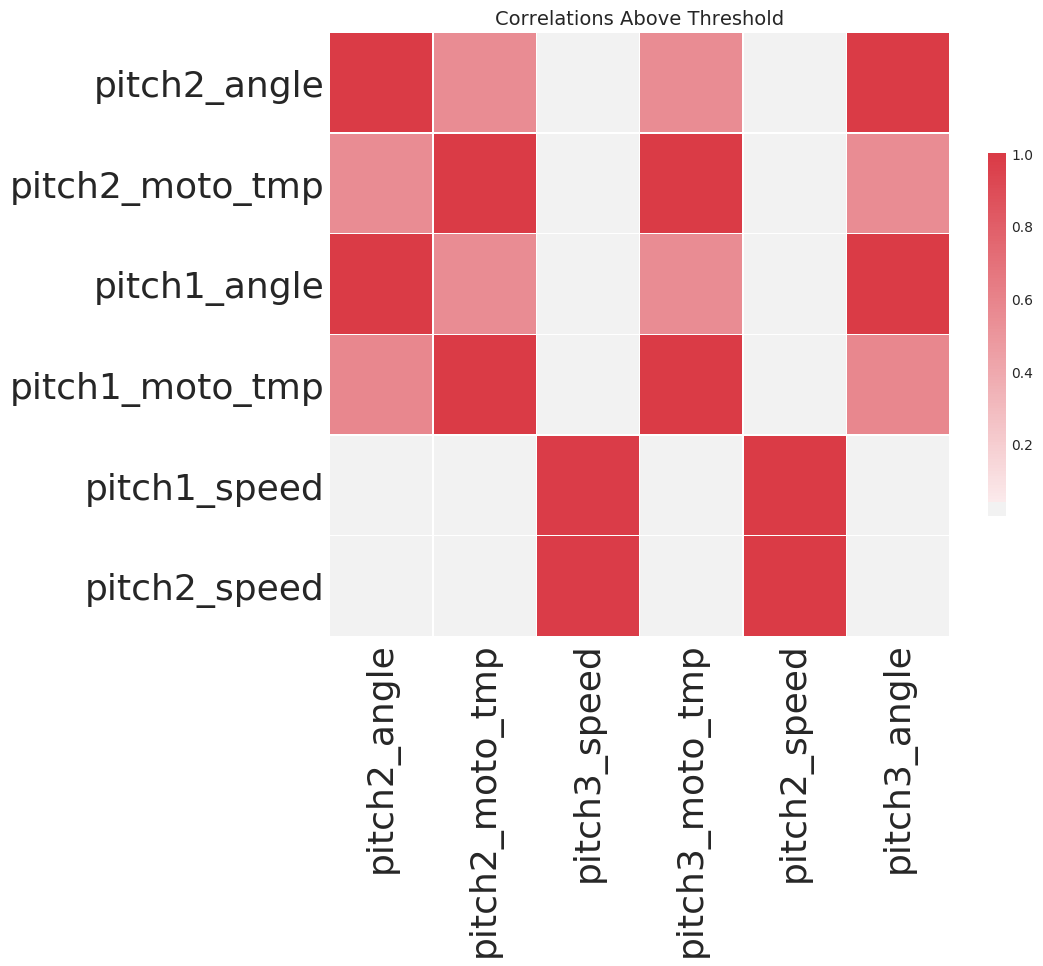

In [20]:
fs.plot_collinear()

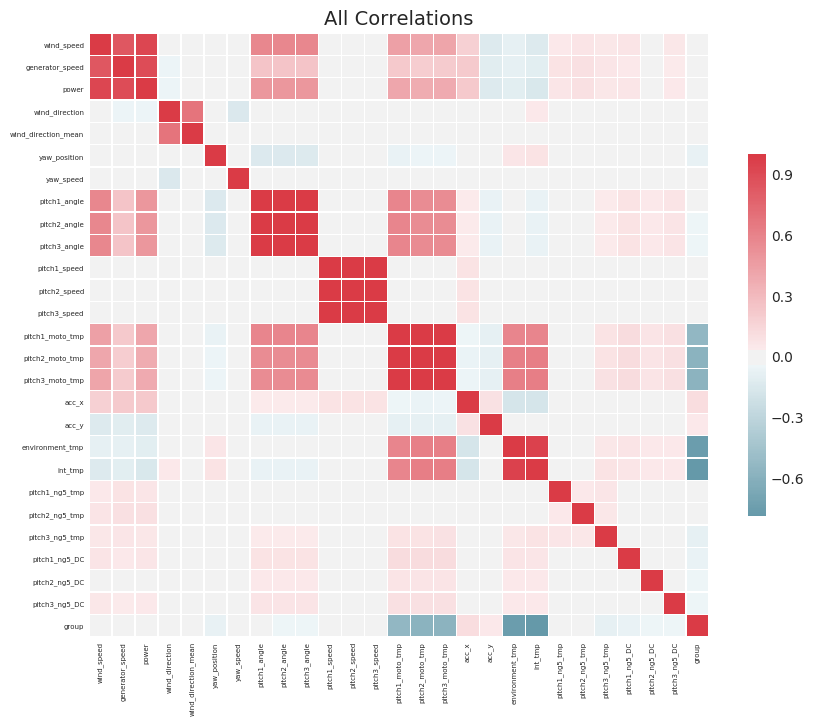

In [21]:
fs.plot_collinear(plot_all=True)

In [22]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,pitch2_angle,pitch1_angle,0.999563
1,pitch3_angle,pitch1_angle,0.999356
2,pitch3_angle,pitch2_angle,0.999525
3,pitch2_speed,pitch1_speed,0.992649
4,pitch3_speed,pitch1_speed,0.990925


检测—Zero Importance Features

In [25]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

MemoryError: 

In [26]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 28 original features


TypeError: object of type 'NoneType' has no len()

检测—Low Importance Features

In [27]:
fs.identify_low_importance(cumulative_importance = 0.99)

NotImplementedError: Feature importances have not yet been determined. 
                                         Call the `identify_zero_importance` method first.